In [1]:
# Importações iniciais
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1

Escreva um código que estime a área de um disco unitário com o mesmo
método usado no problema de Buffon. Sabemos que o raio do disco é 1,
então o círculo está inscrito em um quadrado de lado 2 (slide 9). Dica: Gere amostras nesse quadrado e conte os pontos que estão
dentro do disco. Para testar se um ponto está dentro ou fora do disco,
meça a distância do ponto à origem (o centro do disco) e cheque se a
distância é menor ou igual ao raio do disco

Para o caso proposto, temos:
\begin{equation}
    P(x^2 + y^2 \leq 1) = \frac{\pi}{4}
\end{equation}
Assim, temos $\pi = 4 \times \frac{n_{circ}}{n_{tot}}$, onde $n_{circ}$ é o número de pontos dentro da circunferência e $n_{tot}$ é o número total de pontos.

In [2]:
def dist(x, y): # retorna distância do ponto à origem
    return np.sqrt(x**2 + y**2)

d = [] # Lista para guardar as distâncias de cada ponto gerado à origem

# gerando 10 milhões de pontos dentro do quadrado
for _ in range(10000000):
    x_coord = np.random.uniform(-1, 1) 
    y_coord = np.random.uniform(-1, 1)

    # Salvando na lista
    d.append(dist(x_coord, y_coord))

# Lista de pontos no círculo (distância menor que 1):
p_c = [item for item in d if item <= 1]

# número de pontos em cada caso é dado pelo comprimento das listas
print('A estimativa para pi é de {}'.format(4 * len(p_c)/len(d)))

A estimativa para pi é de 3.1419496


# Exercício 2

Escreva um código que calcule a integral usando o método de rejeição e o
método direto.

\begin{equation}
    \int_0^3 (1-x^2)^2 dx
\end{equation}


64


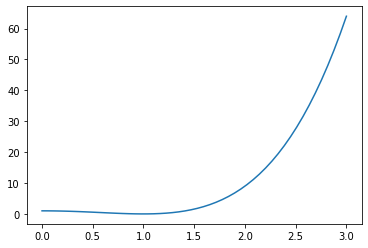

In [3]:
# Analisando a função f(x) = (1-x**2)**2

def func_x(input_x): # função que retorna f(x) para um input x:
    return (1 - input_x**2)**2

# Gerando pontos daa função para plotar
x = np.linspace(0, 3)
y = (1-x**2)**2
plt.plot(x, y)


# Maior valor que a função atinge no intervalo (0,3)
print(func_x(3))

## Metodo da rejeição
Para este método, vamos gerar pontos no retângulo limitado pelo intervalo x = [0,3] e y = [0, 64], uma vez que 64 é o maior valor que $f(x)$ atinge.

O valor da integral é dado por $ I = A \times \frac{m}{N}$, onde $A$ é a área do quadrado, $m$ é a quantidade de pontos abaixo da curva e $N$ é o número total de pontos.

In [4]:
# Área do quadrado:
A_quad = 3 * 64

# Avaliando 10^7 pontos
contagem_total = 10000000
contagem_aceitos = 0 # inicializando contagem de pontos aceitos
counter = 0

for _ in range (contagem_total):
    counter +=1
    # gerando coordenadas x e y nos intervalos especificados
    x_coord = np.random.uniform(0, 3) 
    y_coord = np.random.uniform(0, 64)

    if y_coord < func_x(x_coord): # Caso a coordenada y seja menor que f(x), ou seja, o ponto esteja abaixo da curva, adiciona-se 1 à contagem de pontos aceitos
        contagem_aceitos += 1
    else: # caso esteja acima, não é necessário fazer nada
        pass     

# Calculando a integral como na equação descrita
I = A_quad * contagem_aceitos / contagem_total

print('A integral é: {}'.format(I))

A integral é: 33.5875776


## Método direto
Este método é como uma "média" das áreas dos retângulos de altura f(x).
Para este método usamos a equação:
\begin{equation}
    I = (b-a) \frac{1}{N} \sum_{i=1}^{N} f[x_i (b-a) + a]
\end{equation}

In [5]:
sum_tot = 0 # Inicializando o somatório

n_tot = 1000000 # 10^7 iterações como no caso anterior

# Definindo os limites do intervalo
a = 0
b = 3

for _ in range(n_tot):
    x_coord = np.random.uniform(0, 1) # gera um ponto aleatório entre 0 e 1

    arg = x_coord * (b-a) + a # define o argumento da função f(x) segundo a equação apresentada acima
    
    sum_tot += func_x(arg) # aplica função a este argumento

# Calculando I como na equação acima
I = (b-a) * (1/n_tot) * sum_tot

print('A integral é: {}'.format(I))

A integral é: 33.65872516571308


# Exercício 3

Escreva um código que calcula a seção de choque diferencial do
espalhamento de Rutherford.

\begin{equation}
    \frac{d\sigma}{d \Omega} = \left( \frac{e^2}{8 \pi \epsilon_0 m v_0^2} \right)^2 \frac{1}{\sin^4(\theta/2)}
\end{equation}

In [7]:
# Constantes
e = np.exp(1)
epsilon0 = 1 #55.263 * 10000 #e^2 GeV^-1 fm^-1

# Dados da partícula
m = 1 #0.511 * 10000 # Mev/c^2
v0 = 1 # c (30% da velocidade da luz)

In [8]:
def esp_ruth(theta, m=m, v0=v0): # Calcula a equação do problema para um ângulo
    sigma = ( (e)**2 / (8 * np.pi * epsilon0 * m * v0**2) )**2 * ( 1 / np.sin(theta/2)**4 )
    return sigma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


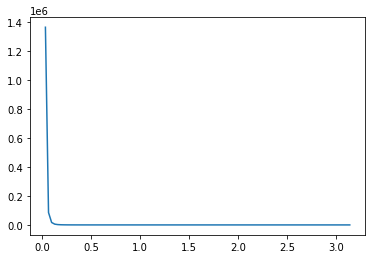

In [9]:
range_theta = np.linspace(0, np.pi, 100) # gerando 100 ângulos entre 0 e pi
range_ruth = [esp_ruth(item) for item in range_theta] # aplicando a equação a cada um desses ângulos

plt.plot(range_theta, range_ruth)

In [ ]:
n = 10000 #número de eventos

data_theta = []

for _ in range(n):
    while True:        
        theta = np.pi * np.random.uniform(0, 1)
        y = max(range_ruth) * np.random.uniform(0, 1)
        
        # Cross section
        sigma = esp_ruth(theta)
        
        #Método de rejeição
        
        if y <= sigma: 
            print('Funcionou')
            data_theta.append(theta)
            break


In [ ]:
plt.hist(data_theta, 100)